<a href="https://colab.research.google.com/github/nxxk23/BasicProg_DataViz65/blob/main/%5BDataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

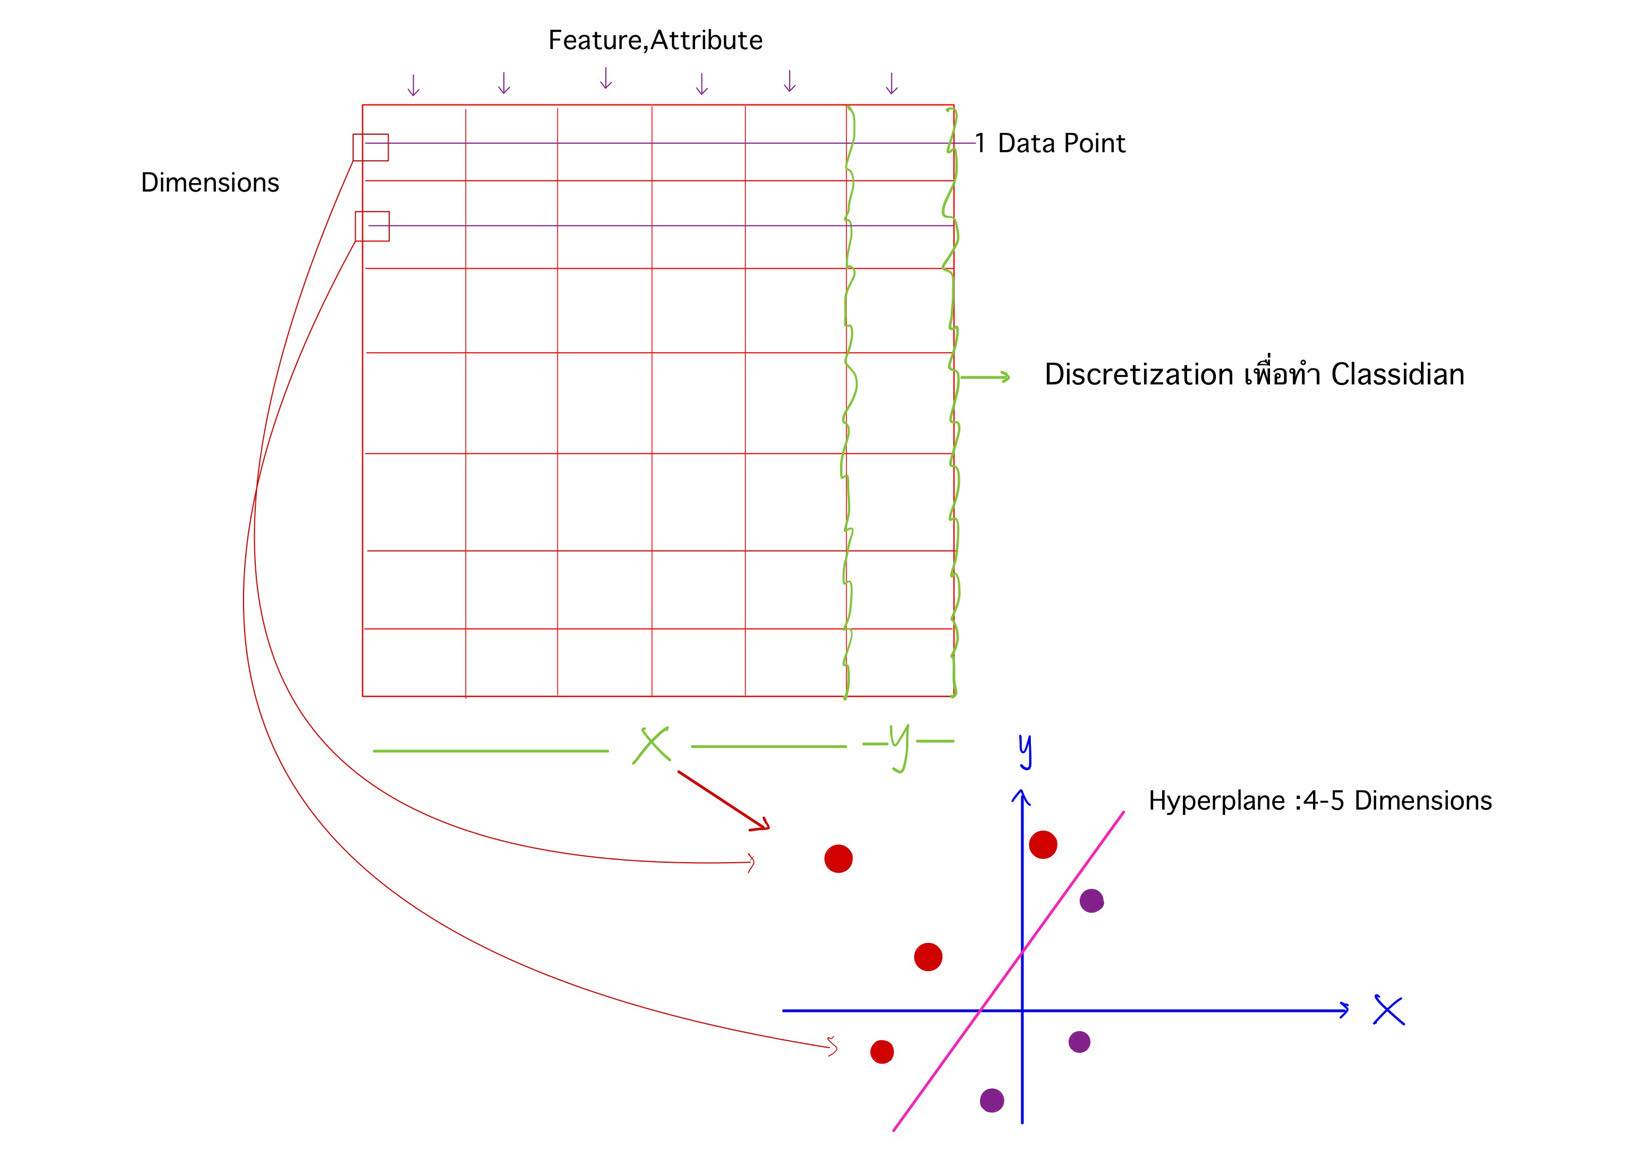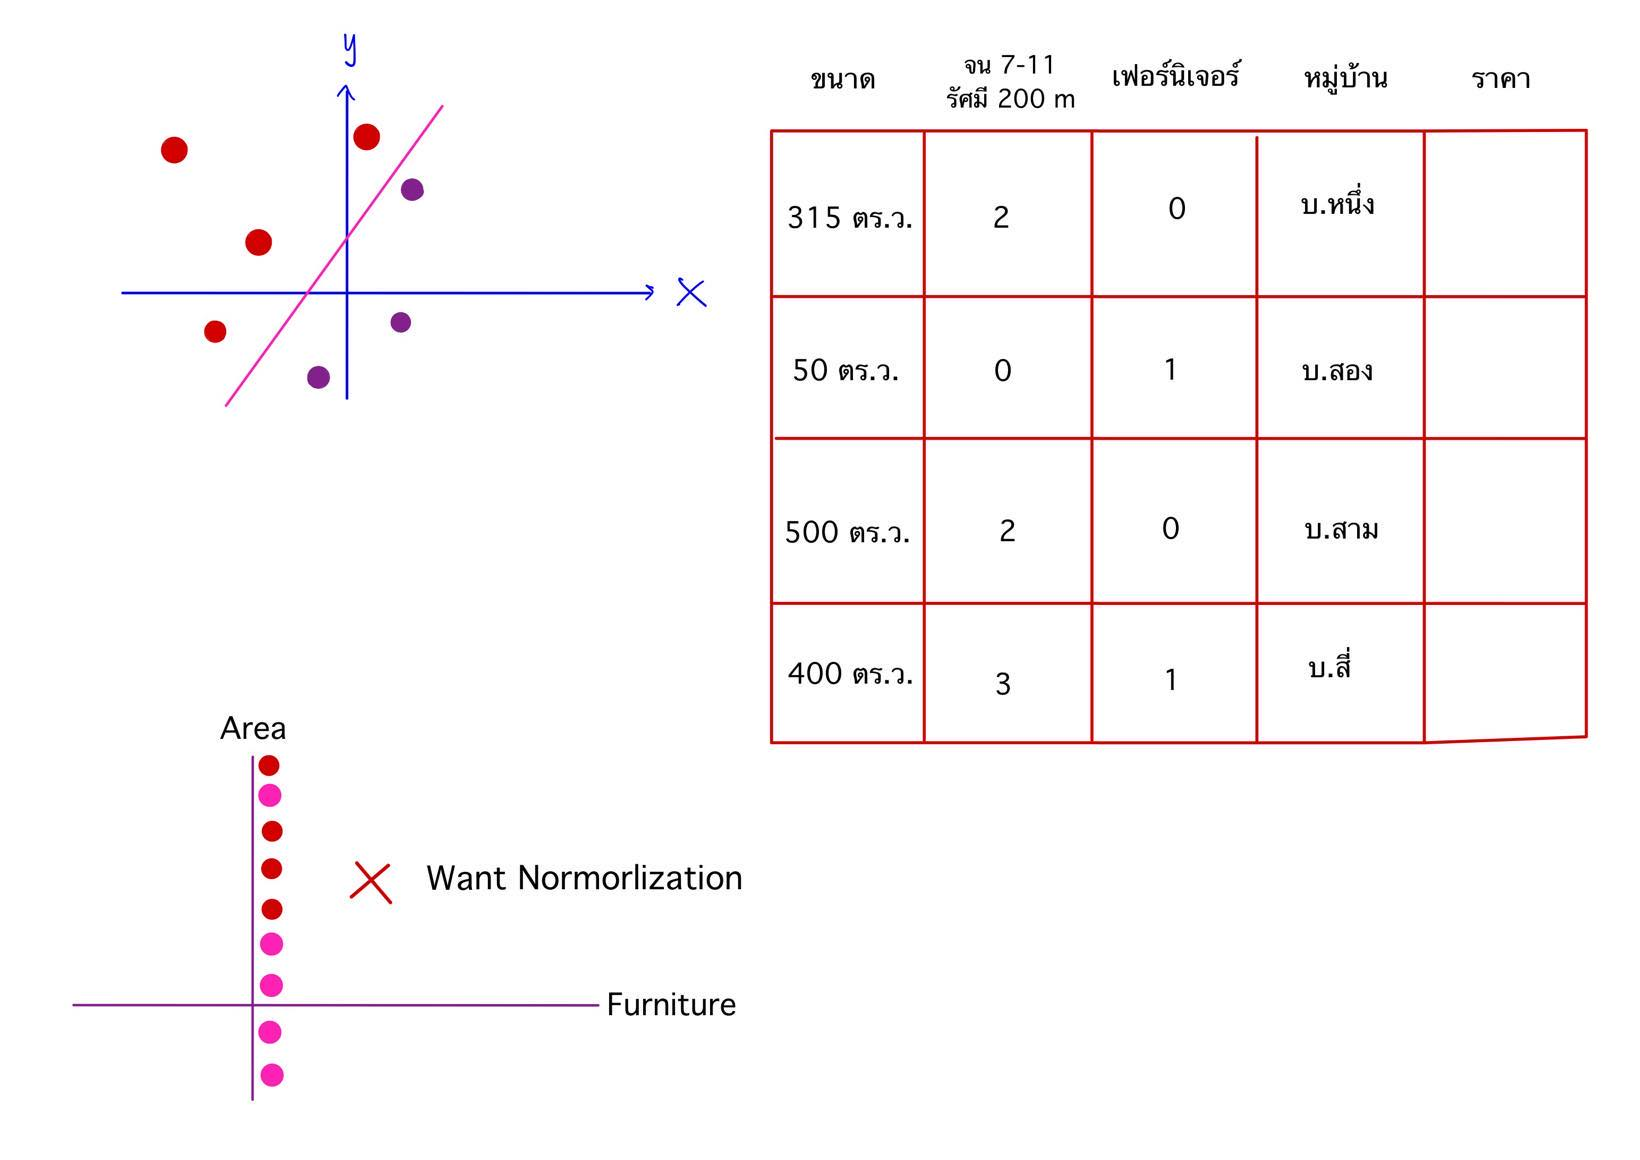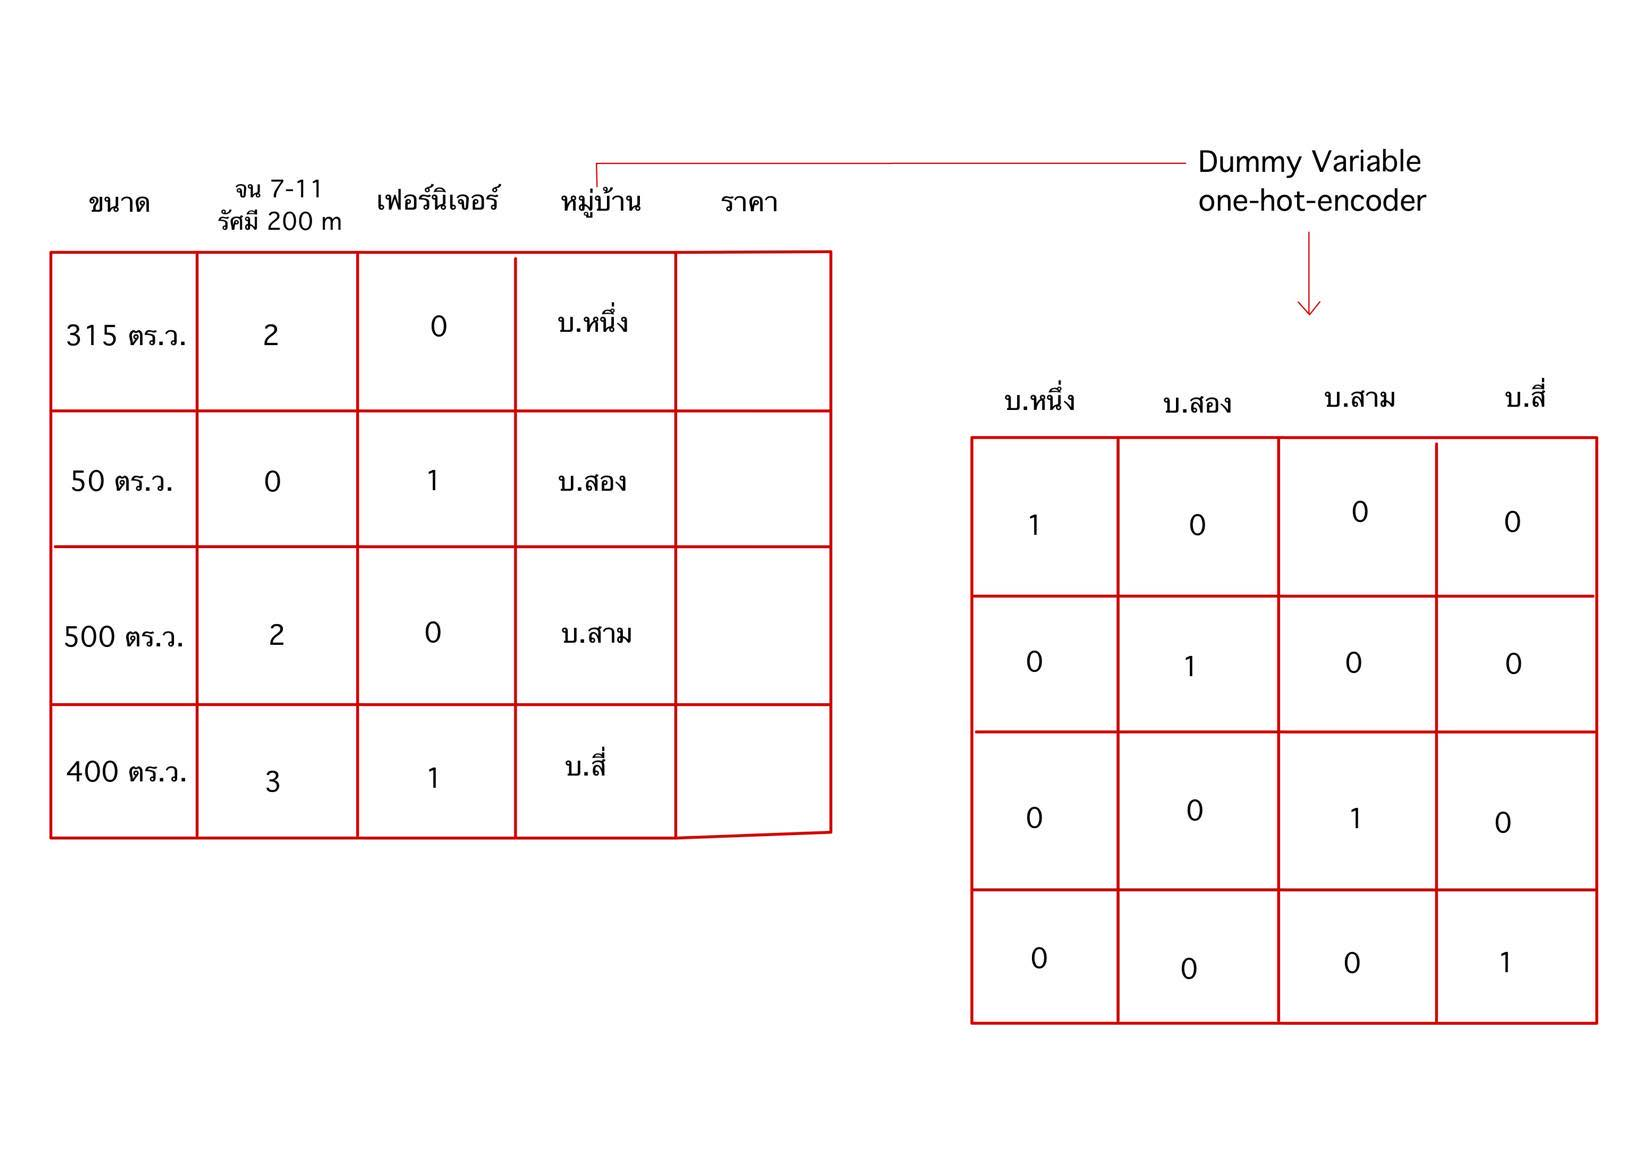

#Normalization - Standardization

https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

## ใช้ Data กรมอุตุ

In [ ]:
weather_data = pd.read_csv('/content/drive/MyDrive/DPDM/Group7_17ธนภรณ์_19นารากร_20สุริยา_35อรัญญา.csv')
weather_data.head()

In [ ]:
weather_data.shape

predict lowest temp 

In [ ]:
data_features = weather_data.iloc[:,12:20]
data_features.head()

In [ ]:
data_features.dtypes

In [ ]:
data_features.describe()

In [ ]:
##code find value that we want
weather_data[weather_data.eq('-').any(1)] #.any(1) หาทุกๆคอลัมน์

In [ ]:
data_features_d = data_features[data_features.eq('-').any(1)==False]
data_features_d.shape

In [ ]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d.shape

###แปลงให้เป็นตัวเลข

In [ ]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [ ]:
data_features_d.describe()

###plot

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,8]

In [ ]:
pd.plotting.scatter_matrix(data_features_d);

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.hist(data_features_d['ความกด'])

In [ ]:
from sklearn import preprocessing

In [ ]:
#define
scaler = preprocessing.StandardScaler() #ตั้งค่า parameter ว่าเราจะทำ standard scaler จาก package preprocessing 
#train
scaler.fit_transform(data_features_d) #.fit with data to create model
#predict
data_features_d_s = scaler.transform(data_features_d) #.transform ทำนาย data เดิม .predict ทำนาย data ใหม่

In [ ]:
data_features_d_s

In [ ]:
plt.hist(data_features_d_s[:,0])

###Standardization 
Min : 0

In [ ]:
plt.subplot(121)
plt.hist(data_features_d['ความกด'])
plt.subplot(122)
plt.hist(data_features_d_s[:,0]);

In [ ]:
plt.subplot(121)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(122)
plt.hist(data_features_d_s[:,6]);
#data เกาะกลุ่ม 0-1 ต้องทำ dummy ก่อน

###Min Max Normalization 
หา min:0 max:1

In [ ]:
#define
scaler = preprocessing.MinMaxScaler() #ตั้งค่า parameter ว่าเราจะทำ standard scaler จาก package preprocessing 
#train
scaler.fit_transform(data_features_d) #.fit with data to create model
#predict
data_features_d_norm = scaler.transform(data_features_d) #.transform ทำนาย data เดิม .predict ทำนาย data ใหม่

In [ ]:
data_features_d_norm

In [ ]:
plt.subplot(131)
plt.hist(data_features_d['ความกด'])
plt.subplot(132)
plt.hist(data_features_d_s[:,0])
plt.subplot(133)
plt.hist(data_features_d_norm[:,0])

#Discretization

##ใช้ Data บ้าน

classification ทำนายกลุ่มราคา sell_price

In [ ]:
import pandas as pd
home_data = pd.read_csv('/content/drive/MyDrive/DPDM/19_นารากร วรกุล.csv')
home_data

## delete record sell_price is null

In [ ]:
home_data['sell_price'].isnull().any()

In [ ]:
home_data = home_data.dropna(subset=['sell_price'])

In [ ]:
home_data

In [ ]:
plt.hist(home_data['sell_price']);

##แปลงค่า sell_price 
- ที่ต่ำกว่า 500k ให้เป็น 1
- ราคาระหว่าง 500k-1m ให้เป็น 2
- ราคา 1m ขึ้นไป ให้เป็น 3

In [ ]:
def filter(x):
    if x < 5000000 :
        return '1'
    if (x > 5000000 and x < 100000000):
        return '2'
    if x > 10000000:
        return '3'
home_data['category'] = home_data['sell_price'].apply(filter)

In [ ]:
home_data

#One-hot-Encoder

In [ ]:
home_data_dummies = pd.get_dummies(home_data ,columns = ['zone']) #เลือกคอลัมน์ที่ค่ามันซ้ำกัน เพื่อทำ dummy variables

In [ ]:
home_data_dummies